<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/AFLUENCIA_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [97]:
df = pd.read_excel('AFLUENCIA_2023.xlsx', parse_dates=['FECHA'], index_col='FECHA')
#Normalización de los datos
scaler = StandardScaler()

            AFLUENCIA
FECHA                
2023-01-01      45541
2023-01-02     128298
2023-01-03     147638
2023-01-04     154646
2023-01-05     166177


In [98]:
# Normalizamos solo la columna de la afluencia diaria
df['Afluencia diaria normalizada'] = scaler.fit_transform(df[['AFLUENCIA']])

MEDIA Y DESVIACION ESTANDAR PARA NORMALIZAR

In [99]:
media = np.mean(df['AFLUENCIA'])
desv = np.std(df['AFLUENCIA'])

In [100]:
# Ver las primeras filas de los datos
print(df.head())

            AFLUENCIA  Afluencia diaria normalizada
FECHA                                              
2023-01-01      45541                     -3.159183
2023-01-02     128298                     -0.938737
2023-01-03     147638                     -0.419827
2023-01-04     154646                     -0.231796
2023-01-05     166177                      0.077591


In [101]:
from sklearn.cluster import KMeans
afluencia_diaria = df['AFLUENCIA'].values
# Reshape los datos para K-means
afluencia_diaria = afluencia_diaria.reshape(-1, 1)
# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(afluencia_diaria)
clusters = kmeans.labels_  # Etiquetas de los clusters
centros = kmeans.cluster_centers_.flatten()
orden = np.argsort(centros)
#Establecer los estados
cluster_map = {orden[0]: "Baja", orden[1]: "Media", orden[2]: "Alta"}
clusters_clasificados = [cluster_map[c] for c in clusters]
#Agregar a la tabla de datos
df['cluster'] = clusters
df['clasificacion'] = [cluster_map[c] for c in clusters]
print("Clasificación de afluencia diaria:")
print(df.head())

Clasificación de afluencia diaria:
            AFLUENCIA  Afluencia diaria normalizada  cluster clasificacion
FECHA                                                                     
2023-01-01      45541                     -3.159183        1          Baja
2023-01-02     128298                     -0.938737        2         Media
2023-01-03     147638                     -0.419827        2         Media
2023-01-04     154646                     -0.231796        2         Media
2023-01-05     166177                      0.077591        0          Alta


In [ ]:

# Exportar los resultados a un archivo nuevo si es necesario
#data.to_csv("afluencia_clasificada.csv", index=False)

In [102]:
estados = df['clasificacion'].values
estados
# Identificar los estados únicos
estados_unicos = list(set(estados))
n_estados = len(estados_unicos)

In [103]:
# Identificar los estados únicos
estados_unicos = list(set(estados))
n_estados = len(estados_unicos)

# Crear un diccionario para asignar índices a los estados
estado_indices = {estado: i for i, estado in enumerate(estados_unicos)}

# Inicializar la matriz de transición con ceros
transiciones = np.zeros((n_estados, n_estados))

# Contar transiciones
for (estado_actual, estado_siguiente) in zip(estados[:-1], estados[1:]):
    i = estado_indices[estado_actual]
    j = estado_indices[estado_siguiente]
    transiciones[i, j] += 1

# Normalizar filas para obtener probabilidades
matriz_transicion = transiciones / transiciones.sum(axis=1, keepdims=True)

# Convertir a DataFrame para una mejor visualización
matriz_transicion_df = pd.DataFrame(
    matriz_transicion,
    index=estados_unicos,
    columns=estados_unicos
)

print("Matriz de Transición:")
print(matriz_transicion_df)

Matriz de Transición:
           Alta      Baja     Media
Alta   0.757720  0.040380  0.201900
Baja   0.630252  0.226891  0.142857
Media  0.229508  0.606557  0.163934


In [107]:
# Calcular la media y la desviación estándar para cada estado oculto
estadisticas_emision = df.groupby('clasificacion')['AFLUENCIA'].agg([np.mean, np.std])
emisiones = estadisticas_emision
emisiones

<ipython-input-107-ce196f40c71e>:2: FutureWarning: The provided callable <function mean at 0x7e03a79f95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  estadisticas_emision = df.groupby('clasificacion')['AFLUENCIA'].agg([np.mean, np.std])
<ipython-input-107-ce196f40c71e>:2: FutureWarning: The provided callable <function std at 0x7e03a79f96c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  estadisticas_emision = df.groupby('clasificacion')['AFLUENCIA'].agg([np.mean, np.std])


,mean,std
clasificacion,,
Alta,187843.255924,11687.985391
Baja,98031.890756,14283.822165
Media,141986.877049,13734.833820


In [110]:
# Paso 5: Establecer la distribución inicial de los estados (probabilidades de inicio)
# Asumimos que las probabilidades iniciales son iguales para cada estado
#distribucion_inicial = np.ones(n_estados) / n_estados

In [111]:
# Descargar el archivo modificado
#from google.colab import files
#df.to_csv('afluencia_clasificada.csv')
#files.download('afluencia_clasificada.csv')

In [136]:
# Media y desviación estándar de los clusters
B_means = estadisticas_emision['mean'].values  # Medias para cada estado
B_stds = estadisticas_emision['std'].values  # Desviaciones estándar para cada estado

# La distribución inicial de los estados (pi) puede estar basada en los primeros 100 valores
frecuencias_iniciales = np.bincount(df['cluster'][:100])  # Contar la frecuencia de los primeros estados
distribucion_inicial = frecuencias_iniciales / frecuencias_iniciales.sum()  # Normalizar


In [137]:
# Supongamos que 'estados' es una columna de tu DataFrame que indica los estados
estados = df['cluster']  # Si ya tienes una columna con los estados asignados
# Contamos las frecuencias de cada estado al principio de la serie
frecuencias_iniciales = np.bincount(estados[:100])  # Contar la frecuencia de los primeros estados
distribucion_inicial = frecuencias_iniciales / frecuencias_iniciales.sum()  # Normalizamos
print("Distribución Inicial de Estados:", frecuencias_iniciales)
print(distribucion_inicial)

Distribución Inicial de Estados: [51 25 24]
[0.51 0.25 0.24]


In [261]:
# Suponiendo que tienes las medias y desviaciones estándar de los clusters
B_means = estadisticas_emision['mean'].values  # Medias para baja, media, alta afluencia
B_stds = estadisticas_emision['std'].values  # Desviaciones estándar para baja, media, alta afluencia

# Ajustar las medias para los fines de semana (los fines de semana tendrán una afluencia más baja)
# Podemos disminuir las medias de los clusters para los fines de semana
def ajustar_media_finde_semana(media, es_fin_de_semana):
    if es_fin_de_semana:
        return media * 0.5 # Reducir la media en un 30% para los fines de semana
    return media  # Para los días laborables, mantenemos la media igual

# Actualizar las medias para los fines de semana
B_means_ajustado = np.array([ajustar_media_finde_semana(mean, True) for mean in B_means])


In [271]:
# Función para generar una observación (afluencia) dado un estado y ajustada para fin de semana
def sample_observation(state, B_means, B_stds, es_fin_de_semana):
    """Muestra una observación (afluencia) dado el estado actual y ajustado para el fin de semana."""
    # Ajustar la media para los fines de semana
    mean_ajustada = B_means[state]  # Usamos la media estándar
    if es_fin_de_semana:
        mean_ajustada = B_means_ajustado[state]  # Usar la media ajustada para los fines de semana
    return np.random.normal(mean_ajustada, B_stds[state])

# Inicialización de la simulación
current_state = np.random.choice(range(n_estados), p=distribucion_inicial)  # Elegir el estado inicial
predicted_states = [current_state]
predicted_observations = [sample_observation(current_state, B_means, B_stds, False)]  # Iniciamos sin fin de semana

# Simulación para los próximos 7 días
for i in range(7):  # Para los próximos 7 días
    # Calcular si el día estimado es fin de semana
    predicted_date = df.index[-1] + pd.Timedelta(days=i+1)  # Fecha estimada del siguiente día
    es_fin_de_semana = predicted_date.weekday() == 6  # Si el día es sábado (5) o domingo (6), es fin de semana

    # Realizar la transición y generar la observación para ese día
    current_state = sample_next_state(current_state, matriz_transicion, es_fin_de_semana)
    predicted_states.append(current_state)
    predicted_observations.append(sample_observation(current_state, B_means, B_stds, es_fin_de_semana))

# Crear un DataFrame para las predicciones
predicted_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
predicted_df = pd.DataFrame(predicted_observations[1:], columns=['Afluencia estimada'], index=predicted_dates)

# Mostrar las predicciones
print("Predicción de los próximos 7 días con ajustes para fines de semana:")
print(predicted_df)


Predicción de los próximos 7 días con ajustes para fines de semana:
            Afluencia estimada
2024-10-25       202158.803036
2024-10-26       163467.884409
2024-10-27        98057.810880
2024-10-28       209818.106416
2024-10-29       208842.335239
2024-10-30       208740.767918
2024-10-31       189603.478229


In [272]:
predicted_df

,Afluencia estimada
2024-10-25,202158.803036
2024-10-26,163467.884409
2024-10-27,98057.810880
2024-10-28,209818.106416
2024-10-29,208842.335239
2024-10-30,208740.767918
2024-10-31,189603.478229


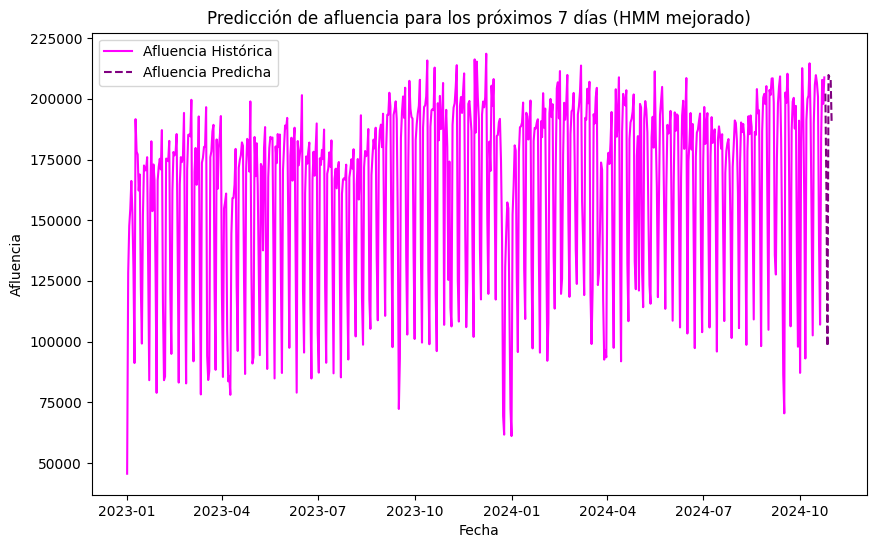

In [276]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AFLUENCIA'], label='Afluencia Histórica', color='magenta')
plt.plot(predicted_df.index, predicted_df['Afluencia estimada'], label='Afluencia Predicha', color='purple', linestyle='--') # Changed to predicted_df.index
plt.legend()
plt.title('Predicción de afluencia para los próximos 7 días (HMM mejorado)')
plt.xlabel('Fecha')
plt.ylabel('Afluencia')
plt.show()

ERROR CUADRATICO MEDIO

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_real = [198491,151848,93165,185470,203048,203777,205492]
y_predicho = predicted_df['Afluencia estimada'].values
mae = mean_absolute_error(y_real, y_predicho)
relativo = mae / np.mean(y_real) * 100
print(relativo)
print(f"MAE relativo: {relativo:.2f}%")

5.733968075857404
MAE relativo: 5.73%


In [287]:
results_df = pd.DataFrame({'y_real': y_real, 'y_predicho': y_predicho})
results_df

,y_real,y_predicho
0,198491,202158.803036
1,151848,163467.884409
2,93165,98057.810880
3,185470,209818.106416
4,203048,208842.335239
5,203777,208740.767918
6,205492,189603.478229


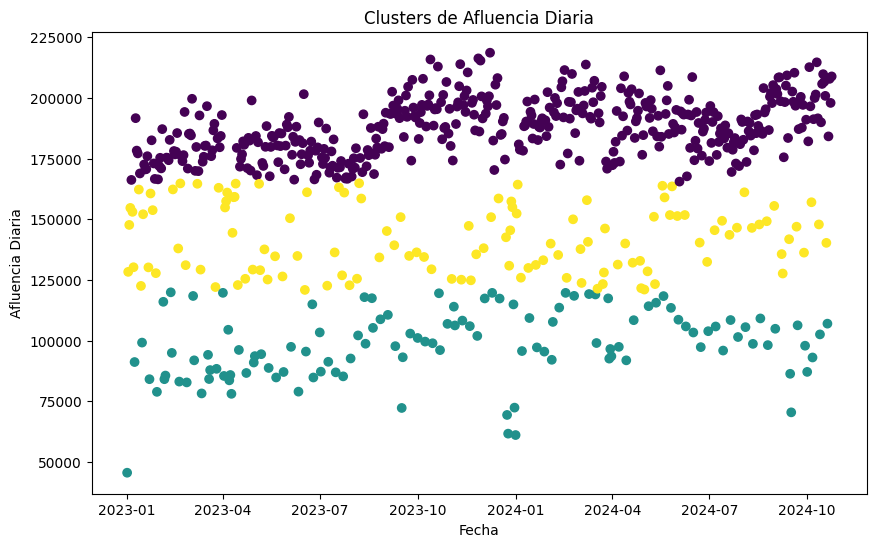

In [288]:

# Gráfico de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['AFLUENCIA'], c=df['cluster'])
plt.title('Clusters de Afluencia Diaria')
plt.xlabel('Fecha')
plt.ylabel('Afluencia Diaria')
plt.show()
